# Overview

In [1]:
# Enviroment Setup

#Standard Libraries for Visualization data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')

# Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# Install the data

df = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Exploratory Data Analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:554: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


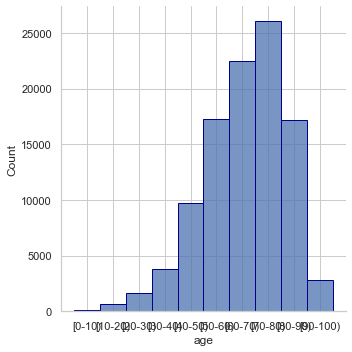

In [5]:
#create a histogram of Age
sns.set_style('whitegrid')
sns.displot(df['age'].dropna(), kde=False, Color='darkblue', bins=100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:554: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


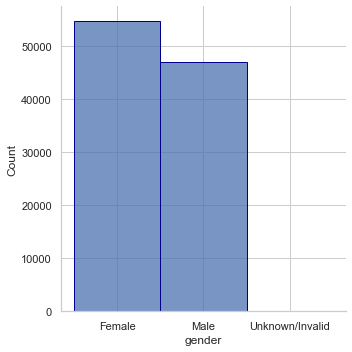

In [6]:
#create a histogram of gender
sns.set_style('whitegrid')
sns.displot(df['gender'].dropna(), kde=False, Color='darkblue', bins=100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:554: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


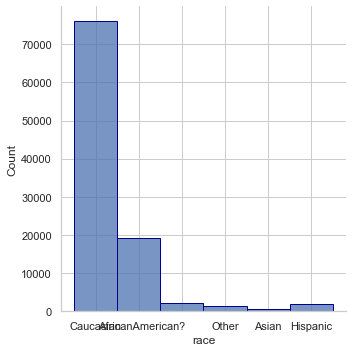

In [7]:
#create a histogram of race
sns.set_style('whitegrid')
sns.displot(df['race'].dropna(), kde=False, Color='darkblue', bins=100)

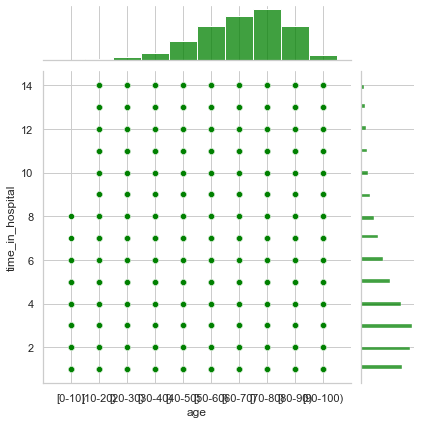

In [8]:
#create a jointplot of 'age'vs'time in hosptial
sns.set_style('whitegrid')
sns.jointplot(x='age', y='time_in_hospital',data=df, color='green')

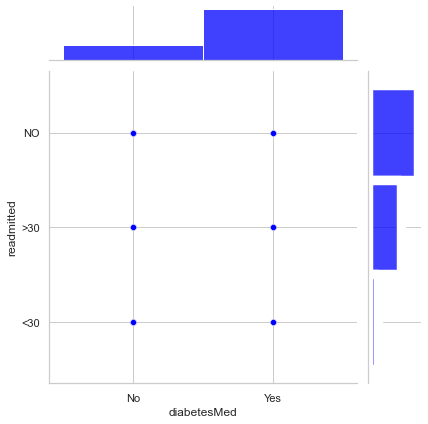

In [9]:
#create a jointplot of 'diabetesMed'vs'readmitted'
sns.set_style('whitegrid')
sns.jointplot(x='diabetesMed', y='readmitted',data=df, color='blue')

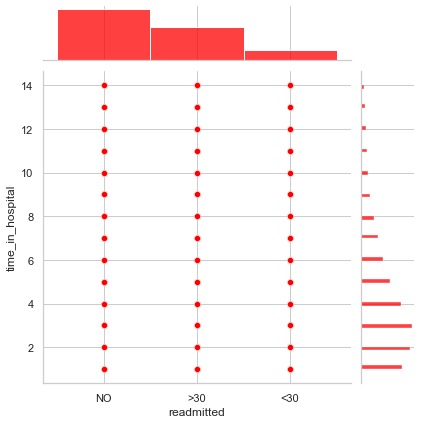

In [10]:
#create a jointplot of 'readmitted 'vs'time in hosptial'
sns.set_style('whitegrid')
sns.jointplot(x='readmitted', y='time_in_hospital',data=df, color='red')

# Data Preparation (Wrangling/cleaning,etc)

In [11]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [12]:
#dropping columns

drop_cols = ['encounter_id', 'patient_nbr','weight','admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1','payer_code','medical_specialty',
       'num_lab_procedures', 'num_procedures','diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change']
df1 = df.drop(drop_cols,axis=1)
df1

,race,gender,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,1,0,0,0,No,NO
1,Caucasian,Female,[10-20),3,18,0,0,0,Yes,>30
2,AfricanAmerican,Female,[20-30),2,13,2,0,1,Yes,NO
3,Caucasian,Male,[30-40),2,16,0,0,0,Yes,NO
4,Caucasian,Male,[40-50),1,8,0,0,0,Yes,NO
...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,16,0,0,0,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,18,0,0,1,Yes,NO
101763,Caucasian,Male,[70-80),1,9,1,0,0,Yes,NO
101764,Caucasian,Female,[80-90),10,21,0,0,1,Yes,NO


In [13]:
df1.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [14]:
#change str(gender) to numeric
gender = pd.get_dummies(df1['gender'],drop_first=True)
df1.drop(['gender'],axis=1,inplace = True)
df1.head()

,race,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
0,Caucasian,[0-10),1,1,0,0,0,No,NO
1,Caucasian,[10-20),3,18,0,0,0,Yes,>30
2,AfricanAmerican,[20-30),2,13,2,0,1,Yes,NO
3,Caucasian,[30-40),2,16,0,0,0,Yes,NO
4,Caucasian,[40-50),1,8,0,0,0,Yes,NO


In [15]:
df1 = pd.concat([df1, gender],axis=1)
df1.head()

,race,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted,Male,Unknown/Invalid
0,Caucasian,[0-10),1,1,0,0,0,No,NO,0,0
1,Caucasian,[10-20),3,18,0,0,0,Yes,>30,0,0
2,AfricanAmerican,[20-30),2,13,2,0,1,Yes,NO,0,0
3,Caucasian,[30-40),2,16,0,0,0,Yes,NO,1,0
4,Caucasian,[40-50),1,8,0,0,0,Yes,NO,1,0


In [298]:
# change str diabetesMed to numberic
diabetesMed = {'No':0, 'Yes': 1}
diabetesMed_change = df1['diabetesMed'].replace(diabetesMed)
df1['diabetesMed_change']= diabetesMed_change
df1

,race,gender,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted,gender_change,diabetesMed_change
0,Caucasian,Female,[0-10),1,1,0,0,0,No,NO,2,0
1,Caucasian,Female,[10-20),3,18,0,0,0,Yes,>30,2,1
2,AfricanAmerican,Female,[20-30),2,13,2,0,1,Yes,NO,2,1
3,Caucasian,Male,[30-40),2,16,0,0,0,Yes,NO,1,1
4,Caucasian,Male,[40-50),1,8,0,0,0,Yes,NO,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,16,0,0,0,Yes,>30,1,1
101762,AfricanAmerican,Female,[80-90),5,18,0,0,1,Yes,NO,2,1
101763,Caucasian,Male,[70-80),1,9,1,0,0,Yes,NO,1,1
101764,Caucasian,Female,[80-90),10,21,0,0,1,Yes,NO,2,1


In [16]:
# change str readmitted to numberic
readmitted_type = {'NO':1, '>30': 2, '<30': 3}
readmitted_change = df1['readmitted'].replace(readmitted_type)
df1['readmitted_change']= readmitted_change
df1

,race,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted,Male,Unknown/Invalid,readmitted_change
0,Caucasian,[0-10),1,1,0,0,0,No,NO,0,0,1
1,Caucasian,[10-20),3,18,0,0,0,Yes,>30,0,0,2
2,AfricanAmerican,[20-30),2,13,2,0,1,Yes,NO,0,0,1
3,Caucasian,[30-40),2,16,0,0,0,Yes,NO,1,0,1
4,Caucasian,[40-50),1,8,0,0,0,Yes,NO,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,[70-80),3,16,0,0,0,Yes,>30,1,0,2
101762,AfricanAmerican,[80-90),5,18,0,0,1,Yes,NO,0,0,1
101763,Caucasian,[70-80),1,9,1,0,0,Yes,NO,1,0,1
101764,Caucasian,[80-90),10,21,0,0,1,Yes,NO,0,0,1


In [17]:
## change str race to numberic
race_type = {'Caucasian':1, 'AfricanAmerican': 2, 'Asian': 3, 'Hispanic':4,  'Other':5, '?':6}
race_change = df1['race'].replace(race_type)
df1['race_change']= race_change
df1

,race,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted,Male,Unknown/Invalid,readmitted_change,race_change
0,Caucasian,[0-10),1,1,0,0,0,No,NO,0,0,1,1
1,Caucasian,[10-20),3,18,0,0,0,Yes,>30,0,0,2,1
2,AfricanAmerican,[20-30),2,13,2,0,1,Yes,NO,0,0,1,2
3,Caucasian,[30-40),2,16,0,0,0,Yes,NO,1,0,1,1
4,Caucasian,[40-50),1,8,0,0,0,Yes,NO,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,[70-80),3,16,0,0,0,Yes,>30,1,0,2,2
101762,AfricanAmerican,[80-90),5,18,0,0,1,Yes,NO,0,0,1,2
101763,Caucasian,[70-80),1,9,1,0,0,Yes,NO,1,0,1,1
101764,Caucasian,[80-90),10,21,0,0,1,Yes,NO,0,0,1,1


In [18]:
## change age to numberic
age_type = {'[0-10)':1, '[10-20)': 2, '[20-30)': 3, '[30-40)':4,  '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8,'[80-90)':9, '[90-100)':10}
age_change = df1['age'].replace(age_type)
df1['age_change']= age_change
df1

,race,age,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted,Male,Unknown/Invalid,readmitted_change,race_change,age_change
0,Caucasian,[0-10),1,1,0,0,0,No,NO,0,0,1,1,1
1,Caucasian,[10-20),3,18,0,0,0,Yes,>30,0,0,2,1,2
2,AfricanAmerican,[20-30),2,13,2,0,1,Yes,NO,0,0,1,2,3
3,Caucasian,[30-40),2,16,0,0,0,Yes,NO,1,0,1,1,4
4,Caucasian,[40-50),1,8,0,0,0,Yes,NO,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,[70-80),3,16,0,0,0,Yes,>30,1,0,2,2,8
101762,AfricanAmerican,[80-90),5,18,0,0,1,Yes,NO,0,0,1,2,9
101763,Caucasian,[70-80),1,9,1,0,0,Yes,NO,1,0,1,1,8
101764,Caucasian,[80-90),10,21,0,0,1,Yes,NO,0,0,1,1,9


In [19]:
#dropping original str columns
drop_cols_1 = ['age','race','diabetesMed','readmitted']
df2 = df1.drop(drop_cols_1, axis=1)
df2

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,Male,Unknown/Invalid,readmitted_change,race_change,age_change
0,1,1,0,0,0,0,0,1,1,1
1,3,18,0,0,0,0,0,2,1,2
2,2,13,2,0,1,0,0,1,2,3
3,2,16,0,0,0,1,0,1,1,4
4,1,8,0,0,0,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...
101761,3,16,0,0,0,1,0,2,2,8
101762,5,18,0,0,1,0,0,1,2,9
101763,1,9,1,0,0,1,0,1,1,8
101764,10,21,0,0,1,0,0,1,1,9


# Build Models

In [20]:
df2.columns

Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'Male', 'Unknown/Invalid',
       'readmitted_change', 'race_change', 'age_change'],
      dtype='object')

In [21]:
ds=df2
y = ds['readmitted_change']
x = ds[['time_in_hospital', 
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',  'race_change','Male', 'Unknown/Invalid',
       'age_change']
       ]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Evaluate Model

In [22]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = logmodel.predict(x_test)
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.58      0.91      0.71     16426
           2       0.49      0.20      0.29     10682
           3       0.45      0.01      0.02      3422

    accuracy                           0.56     30530
   macro avg       0.51      0.38      0.34     30530
weighted avg       0.53      0.56      0.48     30530



[[15027  1394     5]
 [ 8459  2189    34]
 [ 2494   896    32]]


# Select Model

#interpretation

Firstly, I define that the model would be effective, only if the accuracy rate will greater than 80%, that is, at least 80 of every 100 people will be predicted correctly if they will be readmitted in hospital, comparing to the actuality.

But, in the precision term,
1) No, prediction of no readmission, the accuracy rate is 58%, which means, the model will only have 58% chance to correctly predict if a person will not be readmitted in hospital.
2)>30 days, prediction to be readmitted greater than 30 days, the model can have 49% chance to correctly predict if a person will be readmitted in hospital greater than 30 days. 
3) <30, prediction to be readmitted in hospital less than 30 days, the accuracy rate is 45%,

which means the model failed, and we need to find another one. 

and for the recall,
1) No, 91% of the people with no readmission actually were predicted correctly by the model 
2)>30 days, only 20% of the people of the actual readmission in hospital greater than 30 days were predicted correctly
3)<30 days, the model could not predict correctly when patients will be readmitted in hospital less than 30 days, because it only predicted correctly 1% of them.

which means, only for the prediction of no readmission, the model works well.

In conclusion, this model may be effective to predict if the patient will not be readmitted, but failed to predict if he or she will be readmitted inpatient greater or less than 30 days. So, I will not select this model.
